In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

2023-06-09 21:02:50.816580: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 21:02:50.820793: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 21:02:50.906776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 21:02:50.907854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 21:02:52.221236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

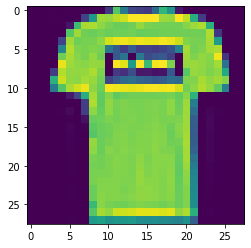

In [8]:
print(x_train.shape) # sample, picxel, picxel
_, axe = plt.subplots()
axe.imshow(x_train[1])

print(x_train[1]) # 이것을 납작하게 모아서 집어넣어야한다.

In [ ]:
# input_shape
# hidden layer : InputLayer와 마지막 Layer 르 제외한 layer
# - 2개의 Dense hidden layers
# -units = 각128개, 64개
# activation = relu
# compile
# - loss = SparseCategoricalCrossentropy(from_logits= True)
# - optimizer = adam, learning_rate = 0.1
# metrics = accuracy
# fit
# -epochs = 50

In [15]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=[28,28]),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1284 - accuracy: 0.7465
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6061 - accuracy: 0.8048
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5328 - accuracy: 0.8199
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4883 - accuracy: 0.8299
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4498 - accuracy: 0.8410
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4347 - accuracy: 0.8437
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4147 - accuracy: 0.8512
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4014 - accuracy: 0.8558
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3905 - accuracy: 0.8589
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.381

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.8544


[0.48773470520973206, 0.8543999791145325]

In [17]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-6.5951720e-03,  6.7920238e-04,  4.8646472e-02, ...,
         -2.1543369e-02, -4.1316297e-02, -4.2641610e-02],
        [-2.9513894e-02,  7.2566964e-02,  7.0944779e-02, ...,
         -3.5037674e-02, -7.2566681e-02,  1.7775972e-01],
        [-4.5548018e-02, -3.8186759e-02,  3.6711294e-02, ...,
         -5.2334584e-02,  8.0569489e-03,  2.4575946e-01],
        ...,
        [ 7.9808600e-02,  9.5928358e-03,  1.1310190e-02, ...,
          4.4912487e-02,  8.3286263e-02, -2.3290807e-01],
        [ 3.4053881e-02, -9.9681117e-02, -5.9726562e-02, ...,
         -3.4563504e-02,  2.0277131e-02,  7.7899951e-01],
        [-8.6719617e-02, -8.6480901e-03, -5.8097608e-02, ...,
         -2.8397830e-02,  7.3297083e-02, -4.6130717e-02]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(128,) dtype=float32, numpy=
 array([-7.77671710e-02, -2.87932847e-02, -3.09467837e-02, -2.69756354e-02,
         8.03664923e-01, -6.98909

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
